## Important

`run_mafft.sh` and `run_raxml.sh` in each subfoloder of `Trees` to build the trees beforehand.

In [1]:
library(ape)
library(sitePath)
suppressPackageStartupMessages(library(ggtree))

METADATA_DIR = "Metadata"
TREES_DIR <- "Trees"
PLOTS_DIR <- "Plots"

H1N1_HA_NAME <- "H1N1_HA"
H3N2_HA_NAME <- "H3N2_HA"
H3N2_HA1_PRE2010_NAME <- "H3N2_HA1_pre2003"
ZIKV_POLYPROTEIN_NAME <- "ZIKV_polyprotein"
SARS_COV_2_CDS_NAME <- "SARS_CoV_2_cds"

H3N2_HA_TREE_DIR <- file.path(TREES_DIR, H3N2_HA_NAME)
H3N2_HA1_PRE2010_TREE_DIR <- file.path(TREES_DIR, H3N2_HA1_PRE2010_NAME)

dir.create(PLOTS_DIR, showWarnings = FALSE)

### 1. H3N2 HA1 pre2010

In [2]:
treeDir <- file.path(TREES_DIR, H3N2_HA1_PRE2010_NAME)

tree <- read.tree(file.path(treeDir, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- addMSA(tree, msaPath = file.path(treeDir, "aligned.fasta"), msaFormat = "fasta")

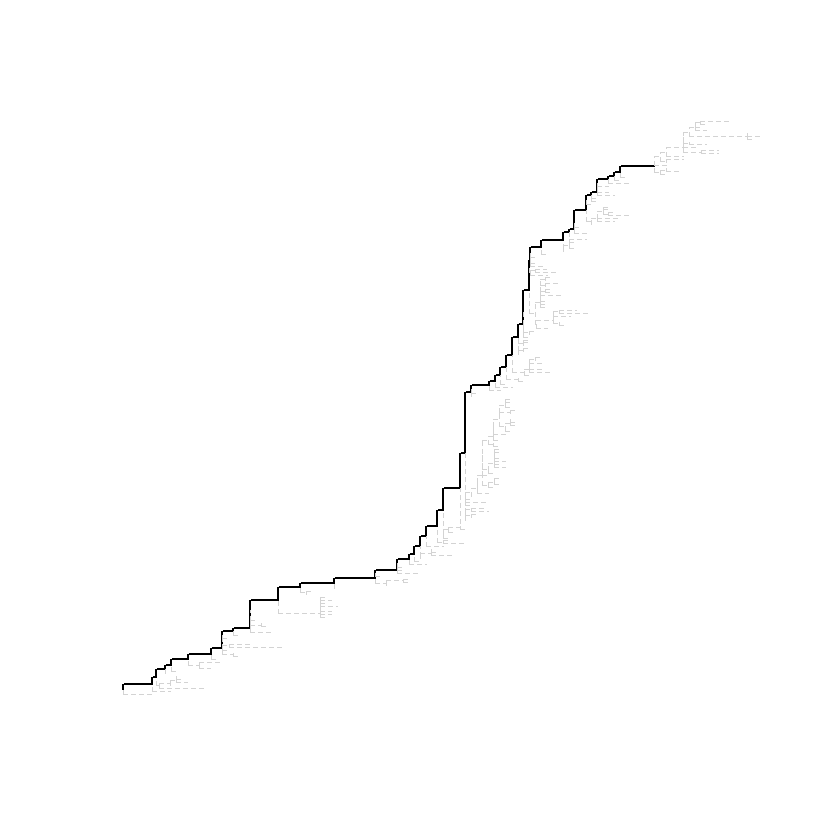

In [3]:
paths <- lineagePath(tree, similarity = 0.07)

plot(paths)

In [5]:
mutations <- fixationSites(paths)

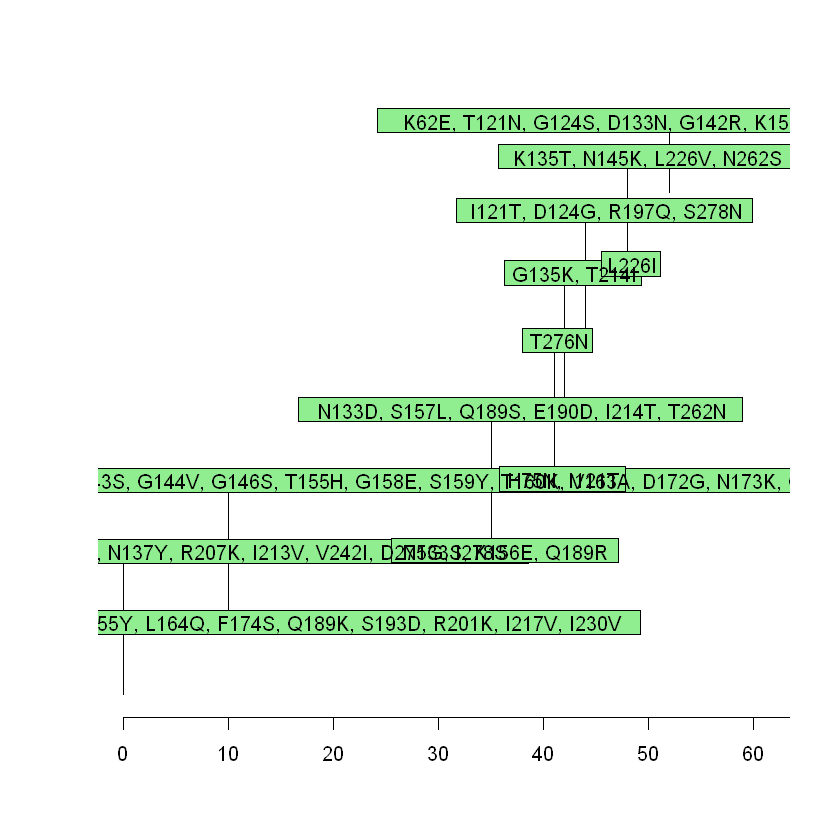

In [6]:
plot(mutations)

### 2. ZIKV polyprotein

In [7]:
treeDir <- file.path(TREES_DIR, ZIKV_POLYPROTEIN_NAME)

tree <- read.tree(file.path(treeDir, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- addMSA(tree, msaPath = file.path(treeDir, "aligned.fasta"), msaFormat = "fasta")

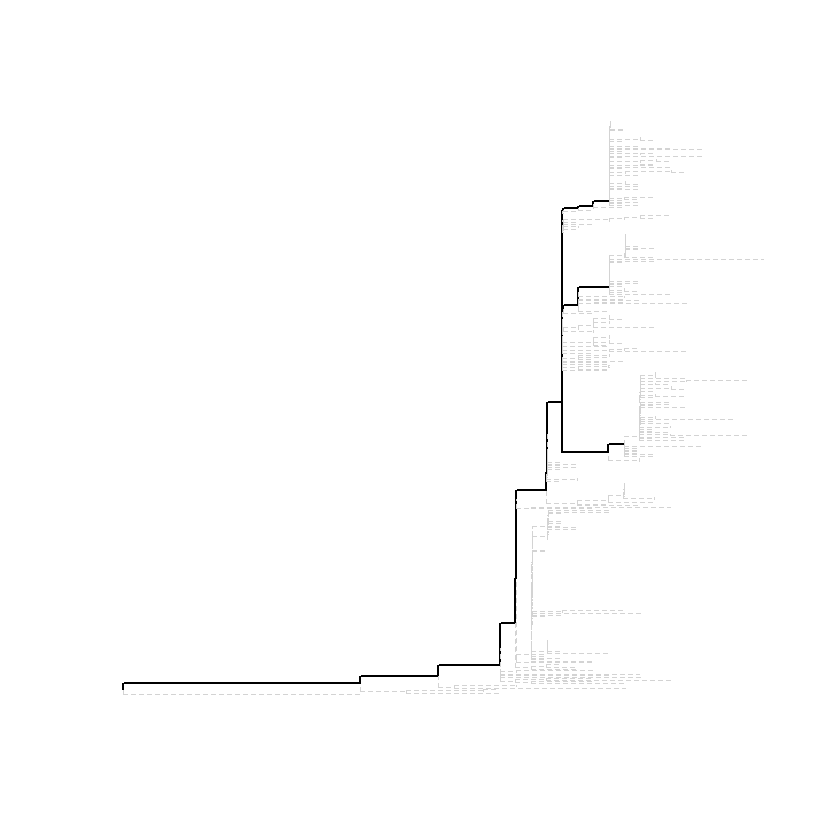

In [8]:
paths <- lineagePath(tree, 0.05)
plot(paths)

In [9]:
mutations <- fixationSites(paths)

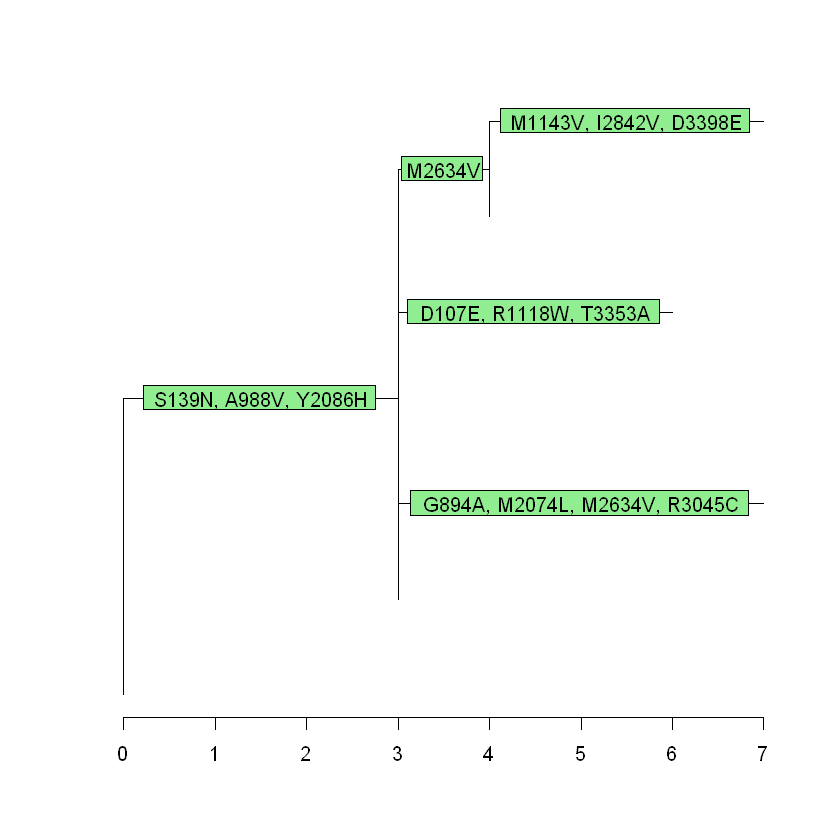

In [10]:
plot(mutations)

### 3. SARS-CoV-2 CDS

In [11]:
meta <- read.csv(
    file.path(METADATA_DIR, paste0(SARS_COV_2_CDS_NAME, ".csv")), 
    row.names = "Accession.ID",
    stringsAsFactors = FALSE
)

In [12]:
treeDir <- file.path(TREES_DIR, SARS_COV_2_CDS_NAME)

tree <- read.tree(file.path(treeDir, "RAxML_bestTree.GTRGAMMA"))
tree <- addMSA(tree, msaPath = file.path(treeDir, "aligned.fasta"), msaFormat = "fasta")

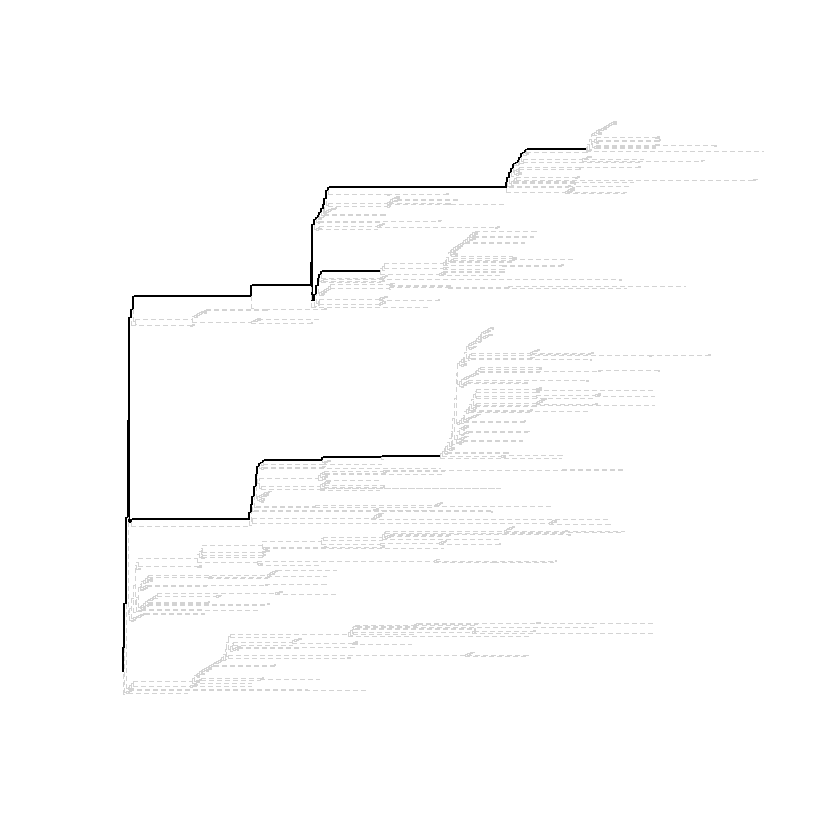

In [13]:
paths <- lineagePath(tree, similarity = 0.03)
plot(paths)

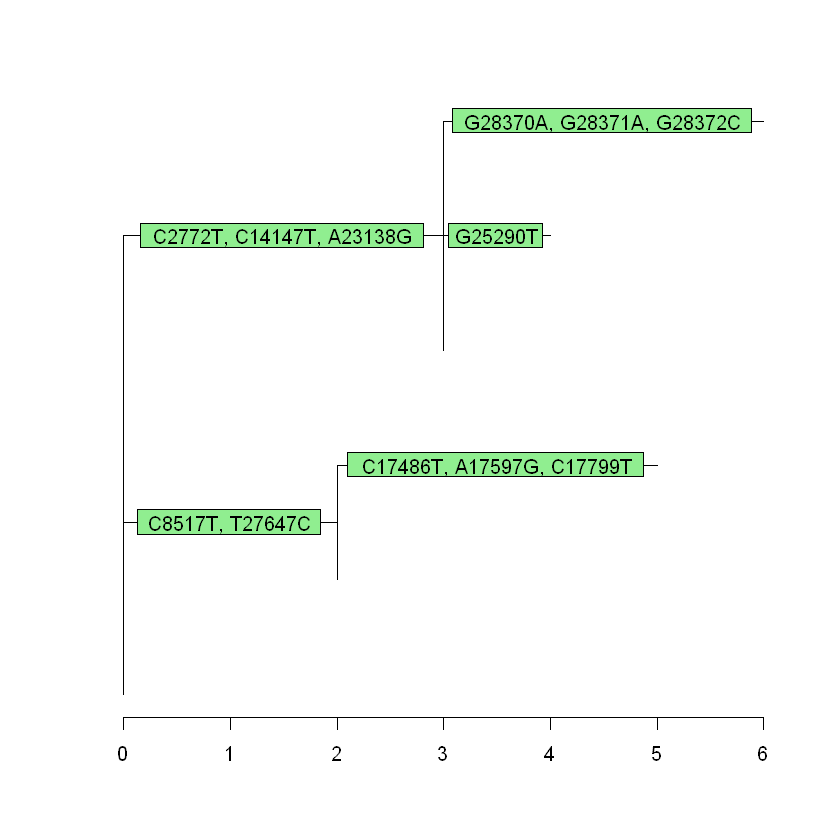

In [14]:
mutations <- fixationlineages(paths)
plot(mutations)

### 1. H1N1 HA

In [15]:
treeDir <- file.path(TREES_DIR, H1N1_HA_NAME)

tree <- read.tree(file.path(treeDir, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- drop.tip(tree, "MK615591")
tree <- addMSA(tree, msaPath = file.path(treeDir, "aligned.fasta"), msaFormat = "fasta")

pdf(file = file.path(PLOTS_DIR, paste0(H1N1_HA_NAME, ".pdf")), width = 15, height = 50)
plot(ladderize(tree), cex = 0.15)
invisible(dev.off())

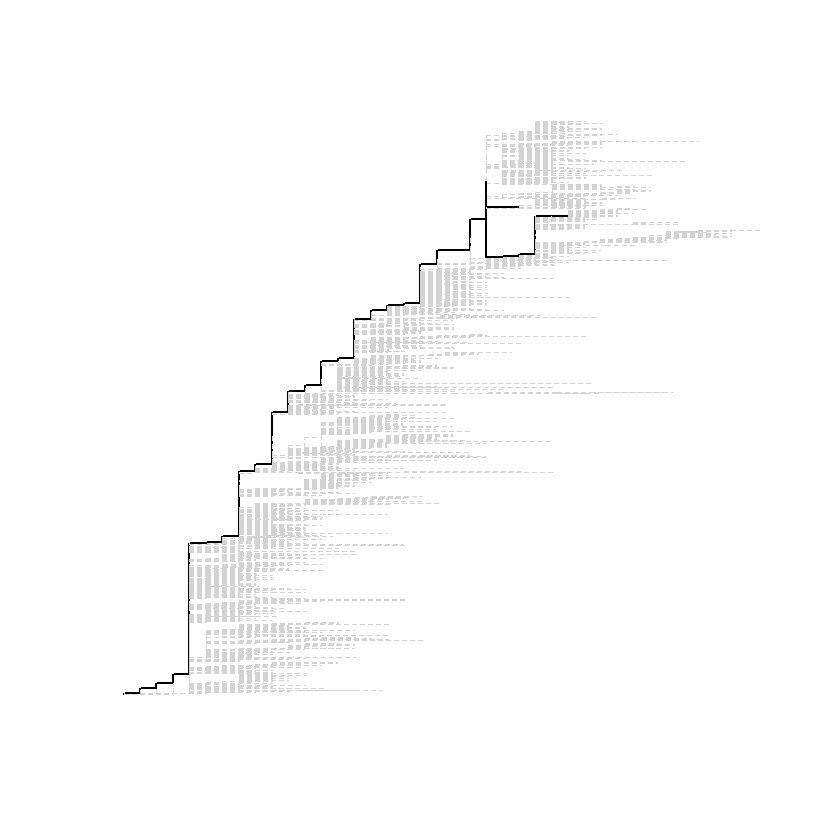

In [16]:
paths <- lineagePath(tree, 0.01)
plot(paths)

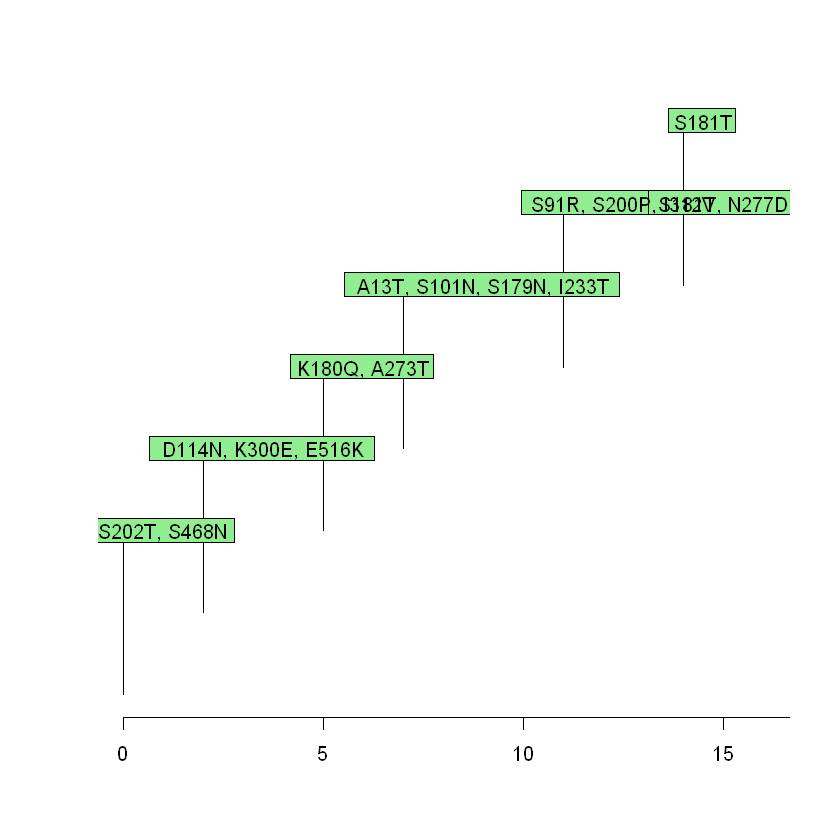

In [17]:
mutations <- fixationSites(paths)
plot(mutations)

### 2. H3N2

In [18]:
tree <- read.tree(file.path(H3N2_HA_TREE_DIR, "RAxML_bestTree.PROTGAMMAGTR"))
tree <- drop.tip(tree, "AB284320")
tree <- addMSA(tree, msaPath = file.path(H3N2_HA_TREE_DIR, "aligned.fasta"), msaFormat = "fasta")

pdf(file = file.path(PLOTS_DIR, paste0(H3N2_HA_NAME, ".pdf")), width = 15, height = 50)
plot(ladderize(tree), cex = 0.15)
invisible(dev.off())

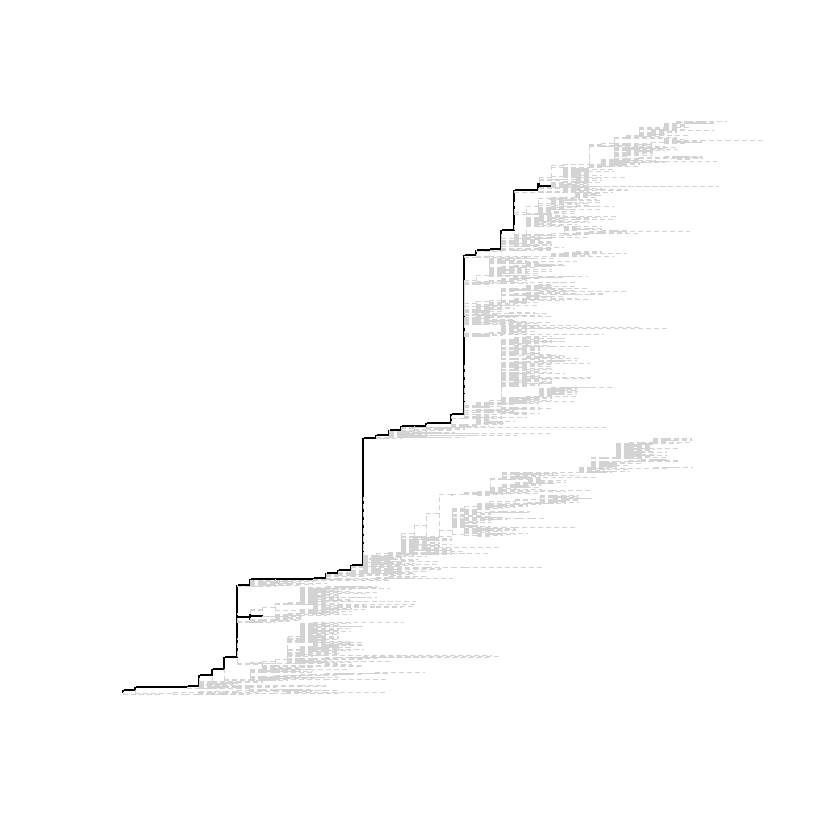

In [19]:
paths <- lineagePath(tree, 0.01)
plot(paths)

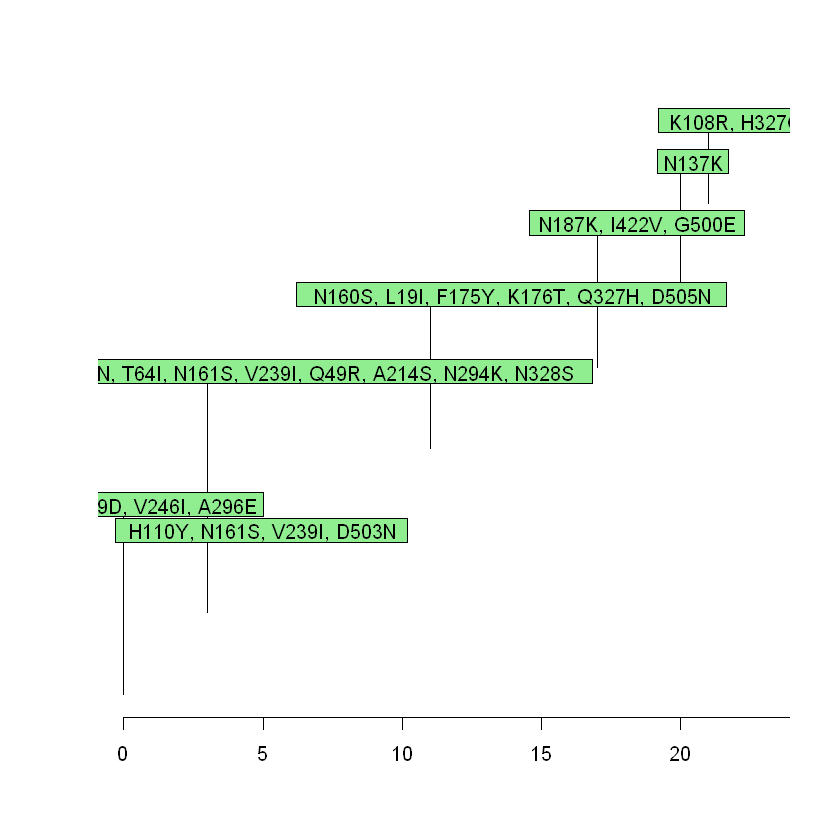

In [20]:
mutations <- fixationSites(paths)
plot(mutations)